## Importing Required Libraries

In [94]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## Obtaining Historical Dataset

In [95]:
# Define the API endpoint and parameters
api_url = "https://archive-api.open-meteo.com/v1/archive?latitude=30.3229&longitude=78.0317&start_date=2000-07-01&end_date=2024-07-01&hourly=temperature_2m,relative_humidity_2m,precipitation,cloud_cover,et0_fao_evapotranspiration"

# Make an API request to fetch weather data
response = requests.get(api_url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()
    
    # Create a DataFrame from the data
    df_hist = pd.DataFrame(data["hourly"])
    
    print("Data fetched")
else:
    print("Failed to fetch data. Check the API URL and parameters.")

Data fetched


In [96]:
df_hist

,time,temperature_2m,relative_humidity_2m,precipitation,cloud_cover,et0_fao_evapotranspiration
0,2000-07-01T00:00,21.8,92,0.0,23,0.02
1,2000-07-01T01:00,22.4,93,0.0,26,0.03
2,2000-07-01T02:00,24.4,89,0.0,24,0.10
3,2000-07-01T03:00,26.1,77,0.3,78,0.22
4,2000-07-01T04:00,26.2,78,1.2,100,0.34
...,...,...,...,...,...,...
210403,2024-07-01T19:00,25.3,94,0.1,20,0.00
210404,2024-07-01T20:00,25.6,90,0.0,36,0.00
210405,2024-07-01T21:00,24.7,96,0.1,46,0.00
210406,2024-07-01T22:00,24.8,95,0.3,100,0.00


In [97]:
df_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210408 entries, 0 to 210407
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   time                        210408 non-null  object 
 1   temperature_2m              210408 non-null  float64
 2   relative_humidity_2m        210408 non-null  int64  
 3   precipitation               210408 non-null  float64
 4   cloud_cover                 210408 non-null  int64  
 5   et0_fao_evapotranspiration  210408 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 9.6+ MB


In [98]:
df_hist.isna().sum()

time                          0
temperature_2m                0
relative_humidity_2m          0
precipitation                 0
cloud_cover                   0
et0_fao_evapotranspiration    0
dtype: int64

## Obtaining Current Dataset

In [99]:
# Define the API endpoint and parameters
api_url = 'https://api.open-meteo.com/v1/forecast?latitude=30.3229&longitude=78.0317&hourly=temperature_2m,relative_humidity_2m,precipitation,cloud_cover,et0_fao_evapotranspiration&past_days=31&forecast_days=3'

# Make an API request to fetch weather data
response = requests.get(api_url)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    # Convert data to a DataFrame for further processing
    df_latest = pd.DataFrame(data["hourly"])
    
    print("Data fetched")
else:
    print("Failed to fetch data. Check the API URL and parameters.")

Data fetched


In [100]:
df_latest

,time,temperature_2m,relative_humidity_2m,precipitation,cloud_cover,et0_fao_evapotranspiration
0,2024-06-14T00:00,25.9,37,0.0,0,0.08
1,2024-06-14T01:00,26.6,42,0.0,0,0.09
2,2024-06-14T02:00,29.3,47,0.0,0,0.19
3,2024-06-14T03:00,33.7,34,0.0,0,0.34
4,2024-06-14T04:00,35.4,26,0.0,0,0.55
...,...,...,...,...,...,...
811,2024-07-17T19:00,25.8,90,1.0,90,0.00
812,2024-07-17T20:00,25.6,91,0.6,82,0.00
813,2024-07-17T21:00,25.5,91,0.0,79,0.00
814,2024-07-17T22:00,25.6,90,0.0,83,0.00


In [101]:
df_latest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   time                        816 non-null    object 
 1   temperature_2m              816 non-null    float64
 2   relative_humidity_2m        816 non-null    int64  
 3   precipitation               816 non-null    float64
 4   cloud_cover                 816 non-null    int64  
 5   et0_fao_evapotranspiration  816 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 38.4+ KB


In [102]:
df = pd.concat([df_hist, df_latest], axis=0)
df

,time,temperature_2m,relative_humidity_2m,precipitation,cloud_cover,et0_fao_evapotranspiration
0,2000-07-01T00:00,21.8,92,0.0,23,0.02
1,2000-07-01T01:00,22.4,93,0.0,26,0.03
2,2000-07-01T02:00,24.4,89,0.0,24,0.10
3,2000-07-01T03:00,26.1,77,0.3,78,0.22
4,2000-07-01T04:00,26.2,78,1.2,100,0.34
...,...,...,...,...,...,...
811,2024-07-17T19:00,25.8,90,1.0,90,0.00
812,2024-07-17T20:00,25.6,91,0.6,82,0.00
813,2024-07-17T21:00,25.5,91,0.0,79,0.00
814,2024-07-17T22:00,25.6,90,0.0,83,0.00


In [103]:
# Define the columns and weights
parameters_to_keep = [
    'temperature_2m',
    'precipitation',
    'relative_humidity_2m',
    'cloud_cover',
    'et0_fao_evapotranspiration',
]
weights = [
    0.1,    # temperature_2m
    0.45,   # precipitation
    0.1,    # relative_humidity_2m
    0.25,   # cloud_cover
    0.1,    # et0_fao_evapotranspiration
]

In [104]:
# Calculate the dot product and assign it to a new column 'RelativeProbability'
df['RelativeProbability'] = df[parameters_to_keep].dot(weights)
df

,time,temperature_2m,relative_humidity_2m,precipitation,cloud_cover,et0_fao_evapotranspiration,RelativeProbability
0,2000-07-01T00:00,21.8,92,0.0,23,0.02,17.132
1,2000-07-01T01:00,22.4,93,0.0,26,0.03,18.043
2,2000-07-01T02:00,24.4,89,0.0,24,0.10,17.350
3,2000-07-01T03:00,26.1,77,0.3,78,0.22,29.967
4,2000-07-01T04:00,26.2,78,1.2,100,0.34,35.994
...,...,...,...,...,...,...,...
811,2024-07-17T19:00,25.8,90,1.0,90,0.00,34.530
812,2024-07-17T20:00,25.6,91,0.6,82,0.00,32.430
813,2024-07-17T21:00,25.5,91,0.0,79,0.00,31.400
814,2024-07-17T22:00,25.6,90,0.0,83,0.00,32.310


In [105]:
min_value = df['RelativeProbability'].min()
max_value = df['RelativeProbability'].max()
df

,time,temperature_2m,relative_humidity_2m,precipitation,cloud_cover,et0_fao_evapotranspiration,RelativeProbability
0,2000-07-01T00:00,21.8,92,0.0,23,0.02,17.132
1,2000-07-01T01:00,22.4,93,0.0,26,0.03,18.043
2,2000-07-01T02:00,24.4,89,0.0,24,0.10,17.350
3,2000-07-01T03:00,26.1,77,0.3,78,0.22,29.967
4,2000-07-01T04:00,26.2,78,1.2,100,0.34,35.994
...,...,...,...,...,...,...,...
811,2024-07-17T19:00,25.8,90,1.0,90,0.00,34.530
812,2024-07-17T20:00,25.6,91,0.6,82,0.00,32.430
813,2024-07-17T21:00,25.5,91,0.0,79,0.00,31.400
814,2024-07-17T22:00,25.6,90,0.0,83,0.00,32.310


In [106]:
# Convert the 'time' column to datetime format
df['time'] = pd.to_datetime(df['time'])

# Filter for the specific date of the cloudburst
cloudburst_date = '2023-07-15'
cloudburst_data = df[df['time'].dt.date == pd.to_datetime(cloudburst_date).date()]

print(cloudburst_data)

                      time  temperature_2m  relative_humidity_2m  \
201936 2023-07-15 00:00:00            24.4                    92   
201937 2023-07-15 01:00:00            24.9                    93   
201938 2023-07-15 02:00:00            25.5                    91   
201939 2023-07-15 03:00:00            26.7                    85   
201940 2023-07-15 04:00:00            27.9                    82   
201941 2023-07-15 05:00:00            28.9                    77   
201942 2023-07-15 06:00:00            29.5                    74   
201943 2023-07-15 07:00:00            28.6                    76   
201944 2023-07-15 08:00:00            29.1                    75   
201945 2023-07-15 09:00:00            29.5                    73   
201946 2023-07-15 10:00:00            27.3                    80   
201947 2023-07-15 11:00:00            25.5                    90   
201948 2023-07-15 12:00:00            26.8                    84   
201949 2023-07-15 13:00:00            26.2      

In [107]:
print(min_value)
print(max_value)

3.7370000000000005
67.51799999999999


In [108]:
df['RelativeProbabilityNormalized'] = (df['RelativeProbability'] - min_value) / (max_value - min_value)
df

,time,temperature_2m,relative_humidity_2m,precipitation,cloud_cover,et0_fao_evapotranspiration,RelativeProbability,RelativeProbabilityNormalized
0,2000-07-01 00:00:00,21.8,92,0.0,23,0.02,17.132,0.210016
1,2000-07-01 01:00:00,22.4,93,0.0,26,0.03,18.043,0.224299
2,2000-07-01 02:00:00,24.4,89,0.0,24,0.10,17.350,0.213433
3,2000-07-01 03:00:00,26.1,77,0.3,78,0.22,29.967,0.411251
4,2000-07-01 04:00:00,26.2,78,1.2,100,0.34,35.994,0.505746
...,...,...,...,...,...,...,...,...
811,2024-07-17 19:00:00,25.8,90,1.0,90,0.00,34.530,0.482793
812,2024-07-17 20:00:00,25.6,91,0.6,82,0.00,32.430,0.449868
813,2024-07-17 21:00:00,25.5,91,0.0,79,0.00,31.400,0.433719
814,2024-07-17 22:00:00,25.6,90,0.0,83,0.00,32.310,0.447986


In [109]:
min = df['RelativeProbabilityNormalized'].min()
max = df['RelativeProbabilityNormalized'].max()

print(min)
print(max)

0.0
1.0


In [110]:
df = df.drop(columns=['time', 'RelativeProbability'])
df

,temperature_2m,relative_humidity_2m,precipitation,cloud_cover,et0_fao_evapotranspiration,RelativeProbabilityNormalized
0,21.8,92,0.0,23,0.02,0.210016
1,22.4,93,0.0,26,0.03,0.224299
2,24.4,89,0.0,24,0.10,0.213433
3,26.1,77,0.3,78,0.22,0.411251
4,26.2,78,1.2,100,0.34,0.505746
...,...,...,...,...,...,...
811,25.8,90,1.0,90,0.00,0.482793
812,25.6,91,0.6,82,0.00,0.449868
813,25.5,91,0.0,79,0.00,0.433719
814,25.6,90,0.0,83,0.00,0.447986


In [111]:
X = df.drop('RelativeProbabilityNormalized', axis='columns')
y = df['RelativeProbabilityNormalized']

In [112]:
X

,temperature_2m,relative_humidity_2m,precipitation,cloud_cover,et0_fao_evapotranspiration
0,21.8,92,0.0,23,0.02
1,22.4,93,0.0,26,0.03
2,24.4,89,0.0,24,0.10
3,26.1,77,0.3,78,0.22
4,26.2,78,1.2,100,0.34
...,...,...,...,...,...
811,25.8,90,1.0,90,0.00
812,25.6,91,0.6,82,0.00
813,25.5,91,0.0,79,0.00
814,25.6,90,0.0,83,0.00


In [113]:
y

0      0.210016
1      0.224299
2      0.213433
3      0.411251
4      0.505746
         ...   
811    0.482793
812    0.449868
813    0.433719
814    0.447986
815    0.477540
Name: RelativeProbabilityNormalized, Length: 211224, dtype: float64

In [114]:
print(len(X))
print(len(y))

211224
211224


In [115]:
X.shape

(211224, 5)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [118]:
model.score(X_test, y_test)

0.9999150427675462

In [119]:
model.score(X_train, y_train)

0.9999853873681434

In [120]:
from sklearn.metrics import r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) to evaluate the model's performance
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R^2) error: {r2}')

R-squared (R^2) error: 0.9999150427675462


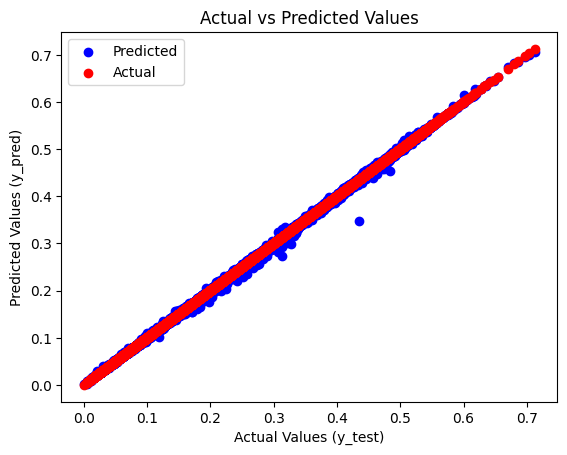

In [121]:
# Plot the predicted vs. actual cloudburst likelihood
plt.scatter(y_test, y_pred, color='blue', label='Predicted')  # Scatter plot for y_pred with blue color
plt.scatter(y_test, y_test, color='red', label='Actual')  # Scatter plot for y_test with red color
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [122]:
df

,temperature_2m,relative_humidity_2m,precipitation,cloud_cover,et0_fao_evapotranspiration,RelativeProbabilityNormalized
0,21.8,92,0.0,23,0.02,0.210016
1,22.4,93,0.0,26,0.03,0.224299
2,24.4,89,0.0,24,0.10,0.213433
3,26.1,77,0.3,78,0.22,0.411251
4,26.2,78,1.2,100,0.34,0.505746
...,...,...,...,...,...,...
811,25.8,90,1.0,90,0.00,0.482793
812,25.6,91,0.6,82,0.00,0.449868
813,25.5,91,0.0,79,0.00,0.433719
814,25.6,90,0.0,83,0.00,0.447986


In [123]:
last_row = df.tail(1).drop(columns=['RelativeProbabilityNormalized']).values
last_row

array([[25.5, 91. ,  0.1, 90. ,  0. ]])

In [124]:
model.predict(last_row)

c:\Users\Hp\Documents\GitHub\cloud-burst-pred\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.47780781])

In [125]:
df.tail(1).values

array([[25.5       , 91.        ,  0.1       , 90.        ,  0.        ,
         0.47754033]])